In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

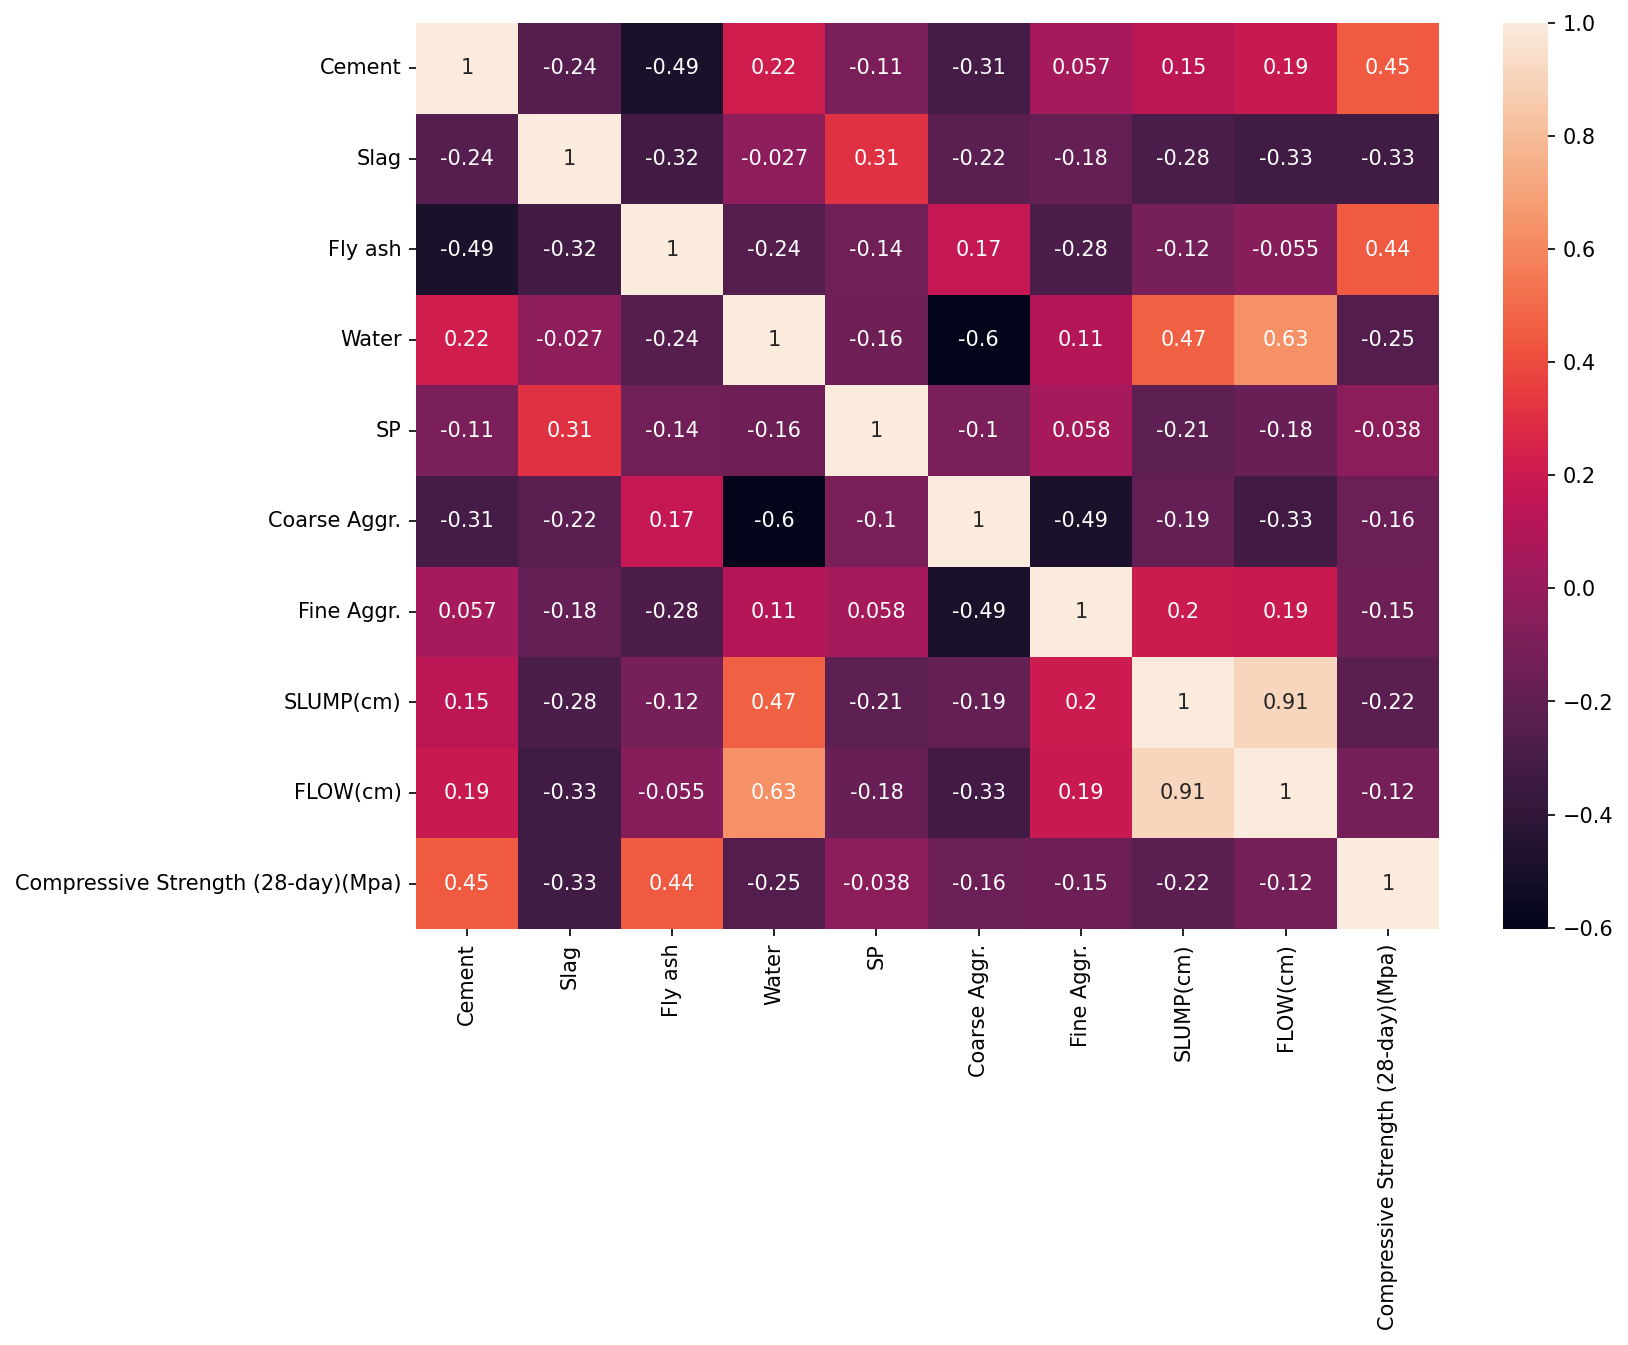

In [11]:
plt.figure(figsize=(11,8),dpi=150)
sns.heatmap(df.corr(),annot=True)

In [13]:
x=df.drop("Compressive Strength (28-day)(Mpa)",axis=1)

In [14]:
y=df["Compressive Strength (28-day)(Mpa)"]

In [29]:
df.shape

(103, 10)

In [36]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

# SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [37]:
from sklearn.svm import SVR,LinearSVR

In [38]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'


In [39]:
base_model=SVR()

In [40]:
base_model.fit(scaled_x_train,y_train)

SVR()

In [41]:

base_preds = base_model.predict(scaled_x_test)
base_preds

array([33.12130173, 37.45318703, 33.14709223, 33.1326943 , 39.93881363,
       36.88751337, 33.70022005, 37.79483968, 37.87048979, 41.36420712,
       37.1414446 ])

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(y_test,base_preds)

4.606437553692728

In [44]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.391449314821403

In [45]:

y_test.mean()

36.46545454545455

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1],
'kernel': ['linear', 'rbf', 'poly'],
'gamma' : ['scale', 'auto'], 'degree': [2,3,4],
'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [49]:
svr = SVR()

In [50]:

grid_model = GridSearchCV(svr, param_grid)

In [52]:

grid_model.fit(scaled_x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [53]:

grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [56]:
grid_preds = grid_model.predict(scaled_x_test)

In [57]:

mean_absolute_error(y_test, grid_preds)

1.4747685625780973

In [58]:

np.sqrt(mean_squared_error(y_test, grid_preds))

1.7793484042378576